<a href="https://colab.research.google.com/github/Saurav1934/Accredian/blob/main/%22Proactive_Fraud_Detection_System_for_Financial_Transactions_using_Machine_Learning%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import os

Downloading...
From (original): https://drive.google.com/uc?id=1BiwzrHBwELuw-OH99uI3zqMwZSaMtUCG
From (redirected): https://drive.google.com/uc?id=1BiwzrHBwELuw-OH99uI3zqMwZSaMtUCG&confirm=t&uuid=25da7147-91ad-4af1-8761-80f32192125c
To: /tmp/fraud.csv
100%|██████████| 494M/494M [00:05<00:00, 84.6MB/s]


Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


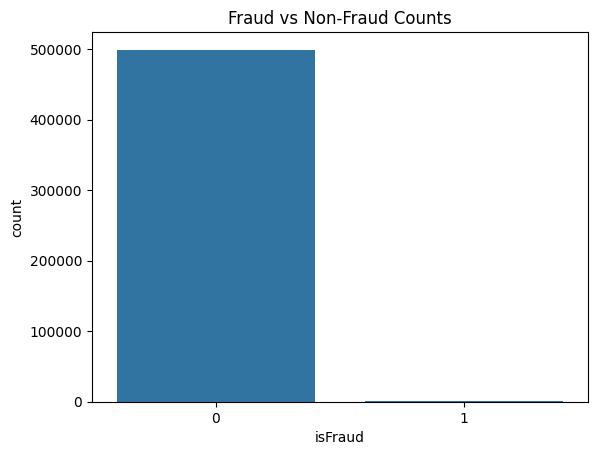

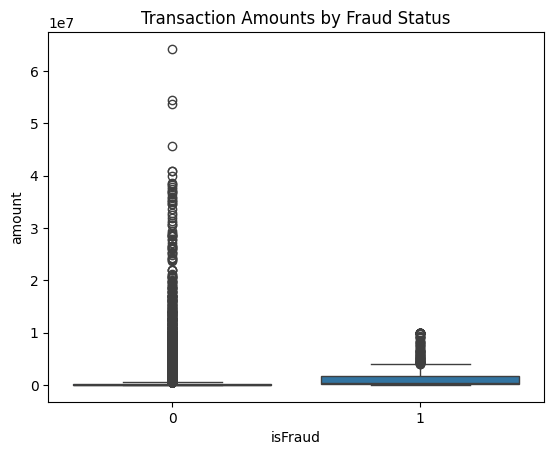

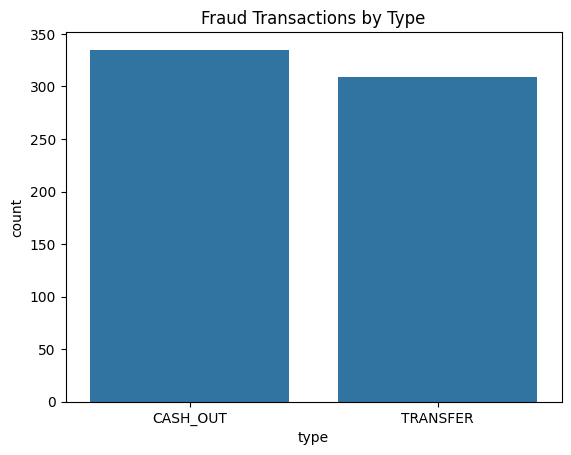


📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149807
           1       0.99      0.71      0.83       193

    accuracy                           1.00    150000
   macro avg       1.00      0.85      0.91    150000
weighted avg       1.00      1.00      1.00    150000

🔥 ROC AUC Score: 0.8549189421649984


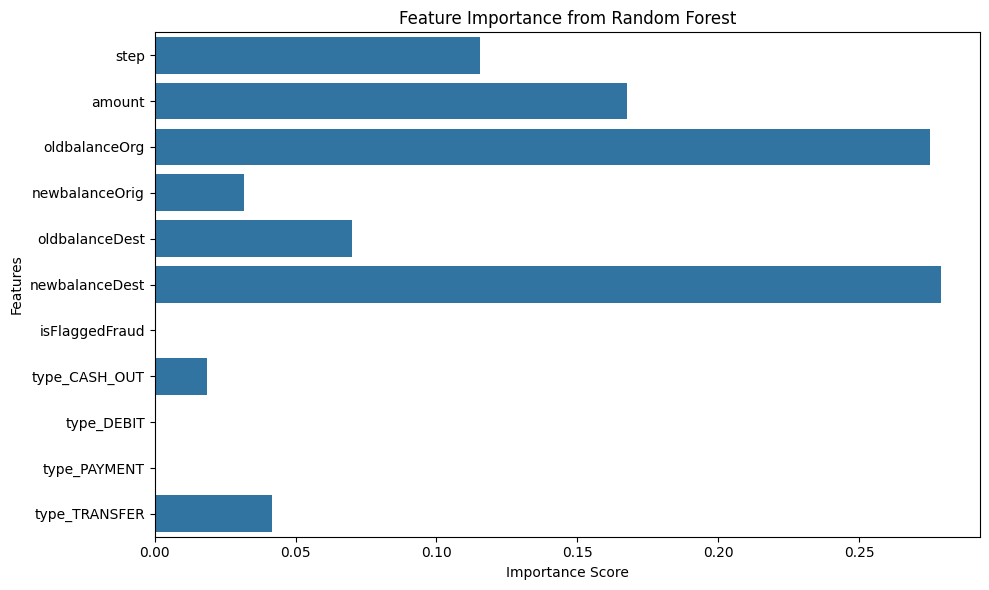

In [13]:
# Download CSV from Google Drive to temporary location
file_id = '1BiwzrHBwELuw-OH99uI3zqMwZSaMtUCG'
url = f'https://drive.google.com/uc?id={file_id}'
temp_path = '/tmp/fraud.csv'

# Download the file
gdown.download(url, temp_path, quiet=False)

# STEP 3: Load the dataset into pandas
df = pd.read_csv(temp_path)

# Check available columns
print("Columns:", df.columns.tolist())

# Drop rows with missing 'isFraud' values
df.dropna(subset=['isFraud'], inplace=True)

# Drop string identifier columns that can't be used for modeling (e.g., account IDs)
df.drop(columns=[col for col in ['nameOrig', 'nameDest'] if col in df.columns], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Sample 500,000 rows using stratified sampling (to include fraud)
df_sample, _ = train_test_split(df, train_size=500000, stratify=df['isFraud'], random_state=42)

# Exploratory Visualization
sns.countplot(data=df_sample, x='isFraud')
plt.title("Fraud vs Non-Fraud Counts")
plt.show()

sns.boxplot(x='isFraud', y='amount', data=df_sample)
plt.title("Transaction Amounts by Fraud Status")
plt.show()

sns.countplot(data=df_sample[df_sample['isFraud'] == 1], x='type')
plt.title("Fraud Transactions by Type")
plt.show()

# Encode categorical feature 'type'
df_sample = pd.get_dummies(df_sample, columns=['type'], drop_first=True)

# Scale numerical features
scaler = MinMaxScaler()
scale_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_sample[scale_cols] = scaler.fit_transform(df_sample[scale_cols])

# Split into features and labels
X = df_sample.drop('isFraud', axis=1)
y = df_sample['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔥 ROC AUC Score:", roc_auc_score(y_test, y_pred))


importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
